<a href="https://colab.research.google.com/github/shivasky18/Fraud_trancations_detuction/blob/main/MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util

nlp = spacy.load("en_core_web_sm")
intent_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
similarity_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def recognize_chat_context(chat_history):
    """
    Analyzes multi-person chat, identifies speakers, intents, and relationships.
    """
    chat_lines = chat_history.strip().split("\n")
    speakers = {}
    messages = []

    for line in chat_lines:
        parts = line.split(": ", 1)
        if len(parts) == 2:
            speaker, message = parts
            speakers[speaker] = speakers.get(speaker, 0) + 1
            messages.append((speaker, message))

    conversation_analysis = []
    embeddings = []

    for speaker, message in messages:

        doc = nlp(message)
        entities = {ent.text: ent.label_ for ent in doc.ents}


        labels = ["greeting", "question", "complaint", "support request", "feedback", "small talk", "business inquiry"]
        intent = intent_classifier(message, candidate_labels=labels)


        conversation_analysis.append({
            "Speaker": speaker,
            "Message": message,
            "Entities": entities,
            "Predicted Intent": intent["labels"][0]
        })


        embeddings.append(similarity_model.encode(message, convert_to_tensor=True))


    topic_shifts = []
    for i in range(1, len(embeddings)):
        similarity_score = util.pytorch_cos_sim(embeddings[i - 1], embeddings[i]).item()
        if similarity_score < 0.6:
            topic_shifts.append(f"Topic Shift Detected Between: {messages[i - 1][0]} → {messages[i][0]}")

    return {
        "Speaker Stats": speakers,
        "Conversation Analysis": conversation_analysis,
        "Topic Shifts": topic_shifts
    }

chat_text = """
Alice: Hey Bob, how are you?
Bob: I'm good, Alice. How about you?
Charlie: Guys, did you hear about the new project deadline?
Alice: No, when is it?
Charlie: It's been moved to next Monday.
Bob: Oh, that's earlier than expected!
Alice: We should start preparing now.
Charlie: Agreed, let's plan a meeting.
"""

result = recognize_chat_context(chat_text)
print(result)


Device set to use cpu


{'Speaker Stats': {'Alice': 3, 'Bob': 2, 'Charlie': 3}, 'Conversation Analysis': [{'Speaker': 'Alice', 'Message': 'Hey Bob, how are you?  ', 'Entities': {'Bob': 'PERSON'}, 'Predicted Intent': 'greeting'}, {'Speaker': 'Bob', 'Message': "I'm good, Alice. How about you?  ", 'Entities': {'Alice': 'PERSON'}, 'Predicted Intent': 'question'}, {'Speaker': 'Charlie', 'Message': 'Guys, did you hear about the new project deadline?  ', 'Entities': {}, 'Predicted Intent': 'question'}, {'Speaker': 'Alice', 'Message': 'No, when is it?  ', 'Entities': {}, 'Predicted Intent': 'question'}, {'Speaker': 'Charlie', 'Message': "It's been moved to next Monday.  ", 'Entities': {'next Monday': 'DATE'}, 'Predicted Intent': 'question'}, {'Speaker': 'Bob', 'Message': "Oh, that's earlier than expected!  ", 'Entities': {}, 'Predicted Intent': 'feedback'}, {'Speaker': 'Alice', 'Message': 'We should start preparing now.  ', 'Entities': {}, 'Predicted Intent': 'question'}, {'Speaker': 'Charlie', 'Message': "Agreed, le

Device set to use cpu


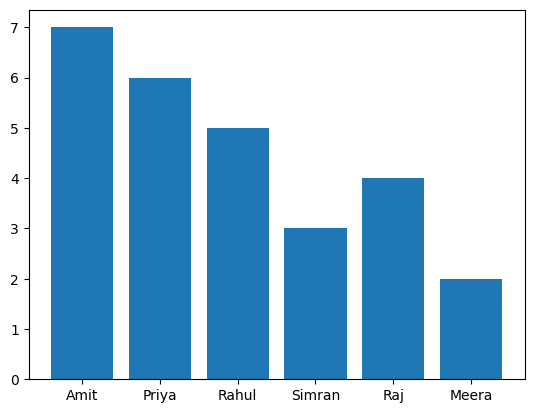

{'Total Speakers': 6, 'Most Active Speaker': 'Amit', 'Overall Intent': 'agreement', 'Intent Distribution': {'agreement': 0.17037566006183624, 'information sharing': 0.12272254377603531, 'decision making': 0.08064767718315125, 'invitation': 0.07992354035377502, 'greeting': 0.07517595589160919, 'suggestion': 0.06816208362579346, 'request': 0.06220626085996628, 'question': 0.05927249416708946, 'feedback': 0.04561096802353859, 'small talk': 0.04417318105697632, 'disagreement': 0.041262995451688766, 'business inquiry': 0.03890177980065346, 'support request': 0.029148759320378304, 'confusion': 0.028899231925606728, 'complaint': 0.019184337928891182, 'emotion': 0.018261220306158066, 'apology': 0.016071263700723648}}


In [ ]:
import spacy
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")
intent_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
similarity_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def recognize_conversation_context(chat_history):
    """
    Analyzes the overall context of a multi-person chat (e.g., overall intent, speaker stats).
    """
    chat_lines = chat_history.strip().split("\n")
    speakers = {}
    messages = []

    for line in chat_lines:
        parts = line.split(": ", 1)
        if len(parts) == 2:
            speaker, message = parts
            speakers[speaker] = speakers.get(speaker, 0) + 1
            messages.append(message)

    plt.bar(speakers.keys(),speakers.values())
    plt.show()


    labels = [
        "greeting", "question", "complaint", "support request", "feedback", "small talk",
        "business inquiry", "apology", "suggestion", "information sharing", "agreement",
        "disagreement", "invitation", "request", "decision making", "emotion", "confusion"
    ]

    overall_message = " ".join(messages)
    overall_intent = intent_classifier(overall_message, candidate_labels=labels)

    total_speakers = len(speakers)
    most_active_speaker = max(speakers, key=speakers.get)

    result = {
        "Total Speakers": total_speakers,
        "Most Active Speaker": most_active_speaker,
        "Overall Intent": overall_intent["labels"][0],
        "Intent Distribution": {intent: score for intent, score in zip(overall_intent["labels"], overall_intent["scores"])}
    }

    return result

chat_text = """
Amit: Hi everyone, how's everything going?
Priya: Hey Amit, things are good! How about you?
Rahul: I'm doing well too, thanks for asking!
Amit: We have an important meeting tomorrow. Do you all have your reports ready?
Priya: Oh, I almost forgot! I need to finish mine.
Rahul: Same here, I'll wrap mine up in the morning.
Amit: No worries, just make sure everything is ready by 10 AM.
Priya: Understood. Thanks for the reminder.
Rahul: Sure thing.
Simran: Can we discuss the new project plan during the meeting?
Raj: Yes, that should be the focus of the meeting.
Meera: Agreed, we need to clarify the deadlines for everyone.
Amit: Good point, Meera. Let's make sure everyone is on the same page.
Priya: I'll bring up the budget estimates during the meeting too.
Raj: Great! I'll gather the marketing data and share it with everyone before the meeting.
Amit: Perfect! We should also discuss the risks involved in the project.
Simran: Agreed. We need to allocate resources carefully.
Rahul: I'll make sure we have enough people on the team.
Priya: Thanks Rahul, that will be really helpful.
Raj: I'm also going to send out the meeting invite.
Amit: Make sure it includes all the details, Raj.
Meera: I'll prepare a presentation for the meeting.
Simran: That sounds good, Meera!
Raj: I'll send the invite in the next 30 minutes.
Amit: Awesome, looking forward to it.
Priya: Thanks everyone, let's make sure this meeting is productive.
Rahul: Agreed! Let's make it a success!
"""

result = recognize_conversation_context(chat_text)
print(result)




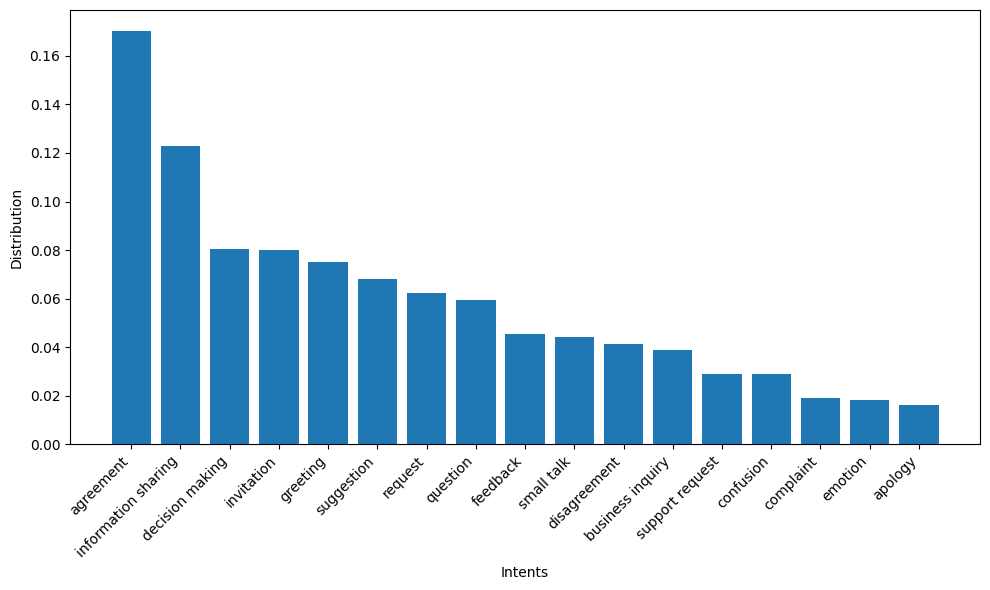

In [ ]:
import matplotlib.pyplot as plt

speakers = result['Intent Distribution']
plt.figure(figsize=(10, 6))
plt.bar(speakers.keys(), speakers.values())
plt.xlabel("Intents")
plt.ylabel("Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
from transformers import pipeline

# Load summarization model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Example chat log (original chat format)
# chat_log = """
# Alice: Hey, do you know when the assignment is due?
# Bob: Yeah, it's due on Friday by 11:59 PM.
# Alice: Oh no, I haven't even started yet!
# Charlie: Me neither! I thought it was due next week.
# Bob: Nope, the professor reminded us in class today.
# Alice: Where do we have to submit it?
# Bob: On the university portal. Make sure to upload the PDF before the deadline.
# Charlie: Ugh, I hope there’s no late submission penalty.
# Bob: There is! A 10% deduction for each late day.
# Alice: That’s harsh. I better get started.
# Charlie: Do you guys understand Question 3?
# Bob: Not really, but I can check my notes.
# Alice: I think it’s about machine learning concepts.
# Charlie: Oh, I totally missed that lecture.
# Bob: Let’s go over it together tomorrow.
# Alice: Sounds good! Also, is there a word limit for the essay part?
# Bob: Yeah, the professor said **1500-2000 words**.
# Charlie: Great, I have only written 200 words so far.
# Alice: Haha, don’t worry. We still have time.
# Bob: Just don’t leave it until the last minute!
# Charlie: I’ll try my best. Thanks for the info, guys.
# Alice: No problem! Let’s ace this assignment.
# """
# chat_log = """
# Alex: Hey, do you guys want to plan something for the weekend?
# Jamie: Yeah, that sounds great! Any ideas?
# Taylor: Maybe a road trip to the mountains?
# Alex: That would be awesome. We could go hiking and have a picnic.
# Jamie: I like that! What’s the weather like this weekend?
# Taylor: I’ll check… Looks like it’ll be sunny on Saturday but rainy on Sunday.
# Alex: Then Saturday is perfect! What time should we leave?
# Jamie: Maybe early in the morning? That way, we can enjoy the whole day there.
# Taylor: Good idea. Should we bring food or buy something on the way?
# Alex: Let’s pack some food. We can bring sandwiches, snacks, and drinks.
# Jamie: Sounds good. I can bring some fruit and chips.
# Taylor: I’ll take care of the drinks. Also, do we need any hiking gear?
# Alex: Just comfortable shoes, water bottles, and maybe a small backpack.
# Jamie: Cool, let’s also bring a speaker for some music!
# Taylor: Yes! I’ll make a playlist. Should we all meet at Alex’s place?
# Alex: That works. Let’s meet at 7 AM and head out by 7:30.
# Jamie: Perfect! I’m excited. It’s going to be a great trip.
# Taylor: Me too! See you guys on Saturday.
# """
chat_log="""Alex: Hey everyone, we need to start planning the college festival. Any ideas on where to begin?
Jamie: We should first decide on a theme for the event. That will help with everything else.
Taylor: I agree. Do we want something modern or something more traditional?
Alex: A mix of both would be nice. Something that appeals to everyone.
Jamie: How about a theme like "Fusion of Cultures" where we showcase different traditions?
Taylor: That sounds great. We can have music, dance, food, and fashion from different cultures.
Alex: Perfect. Now, what about the venue? Should we use the main auditorium or the open ground?
Jamie: The auditorium is better for performances, but the open ground gives us more space.
Taylor: We can divide activities. Performances in the auditorium and food stalls outside.
Alex: Sounds like a good plan. How do we manage the budget?
Jamie: We should reach out to sponsors. Local businesses might be interested.
Taylor: Yes, and we can also charge a small entry fee to cover costs.
Alex: That could work. Who will handle sponsorships?
Jamie: I can take care of that. I will create a sponsorship proposal.
Taylor: I will design posters and promotional materials.
Alex: I will coordinate with the college administration for permissions.
Jamie: We should also create a social media page for the event.
Taylor: Good idea. That will help us attract more people.
Alex: What about the events lineup? We need performances, competitions, and guest speakers.
Jamie: We can have dance and music performances from student groups.
Taylor: A talent show would also be fun. It will encourage more participation.
Alex: Should we invite a guest speaker or a celebrity?
Jamie: If we can find someone relevant, it will boost attendance.
Taylor: We could invite a famous artist or an alumni who has done well.
Alex: I will check with the faculty if they have any contacts.
Jamie: What about food stalls? Do we arrange them ourselves or bring vendors?
Taylor: Bringing vendors is easier. They can pay a small fee to set up stalls.
Alex: That way, we do not have to worry about food preparation.
Jamie: We should also plan decorations and stage setup.
Taylor: Maybe we can get volunteers to help with that.
Alex: Yes, we can ask students to sign up for different tasks.
Jamie: What about security and crowd control?
Taylor: We need to talk to the college security team and arrange volunteers.
Alex: Good point. We should also have first-aid arrangements.
Jamie: That is important. I will check if the medical team can be on standby.
Taylor: We need a proper schedule for the event.
Alex: I will draft a rough timeline and share it.
Jamie: When should we start selling tickets?
Taylor: Once we finalize the performances and promotions.
Alex: We should also contact the media to cover the event.
Jamie: That would help in getting more recognition.
Taylor: Should we have a small competition for attendees?
Alex: That is a good idea. Maybe a best-dressed contest based on the theme.
Jamie: That would be fun and interactive.
Taylor: We should create a checklist so we do not forget anything.
Alex: I will make one and share it in the group.
Jamie: How many days do we have to finalize everything?
Taylor: About three weeks. We need to move fast.
Alex: Then let us set deadlines for each task.
Jamie: Agreed. Let us meet again tomorrow with updates.
Taylor: Sounds good. Let’s make this festival amazing."""

formatted_input = "Summarize the following chat conversation into a structured paragraph without mentioning specific names:\n\n" + chat_log

summary = summarizer(formatted_input, max_length=300, min_length=150, do_sample=False)

# Output formatted summary
summary_text = summary[0]['summary_text']
print("Chat Summary:", summary_text)


Device set to use cpu


Chat Summary: The group discussed how to organize a college festival. The group decided on a theme for the event that would appeal to everyone. They also discussed the venue, security, food and first-aid arrangements, and social media. The meeting ended with the group agreeing to meet again in three weeks to finalize the event and set deadlines for each task. For confidential support, call the Samaritans on 08457 90 90 90, visit a local Samaritans branch, or see www.samaritans.org for details. In the U.S., call the National Suicide Prevention Line on 1-800-273-8255 or go to www.suicidepreventionlifeline.org. For support on suicide matters in the United States, contact the National suicide Prevention Lifeline at 1-877-788-6255.


In [13]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

def summarize_chat(chat_log):
    """
    Summarizes a chat conversation focusing on the main theme.
    """
    # Load the tokenizer and model (using T5-small for efficiency, can be changed to t5-base/t5-large)
    model_name = "t5-small"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    input_text = "summarize: " + chat_log
    inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)

    with torch.no_grad():
        summary_ids = model.generate(inputs.input_ids, max_length=100, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    theme_prompt = "main theme: " + summary
    theme_inputs = tokenizer(theme_prompt, return_tensors="pt", max_length=512, truncation=True)
    with torch.no_grad():
        theme_ids = model.generate(theme_inputs.input_ids, max_length=30, min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True)

    main_theme = tokenizer.decode(theme_ids[0], skip_special_tokens=True)

    return f"Main Theme: {main_theme}\nDetailed Summary: {summary}"

chat_log = """
Alice: Hey, do you know when the assignment is due?
Bob: Yeah, it's due on Friday by 11:59 PM.
Charlie: Oh no, I haven't even started yet!
Alice: Me neither! I thought it was due next week.
Bob: You guys better start soon. It's a long one.
Charlie: What’s the topic again?
Alice: It's about machine learning algorithms.
Bob: Yep, and we need to include real-world applications.
Charlie: That sounds tough. Should we work on it together?
Alice: That’s a good idea. We can split the work.
Bob: How about we meet tomorrow evening to discuss?
Charlie: That works. Let’s meet at 6 PM in the library.
Alice: Perfect! Let’s bring notes so we can divide tasks quickly.
Bob: Agreed! See you guys tomorrow.
"""

summary_output = summarize_chat(chat_log)
print(summary_output)


Main Theme: Alice: You guys better start soon. It's a long one. Charlie: That sounds tough. Should we work on it together
Detailed Summary: Alice: You guys better start soon. It's a long one. Charlie: That sounds tough. Should we work on it together? Alice: That sounds tough. Should we work on it together?
